# My question is whether books with higher prices tended to have better or worse ratings than those with lower prices.
# This will be an observational study, since I won't need to change any values in order to do this.
# I will use a sample of bestselling books collected by my teacher, Sonia Spindt.
# It was collected by looking at the Amazon bestseller lists for the years 2009-2019.
# Biases:
# Bestselling books have generally higher reviews, which reduces the range for reviews, decreasing the certainty of these results.
# Book sales on Amazon are unrepresentative of book sales on other platforms or in bookstores.
# The timeframe is limited; books that hit the bestseller lists before 2009 or after 2019 are not represented.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

books_df = pd.read_csv("books.csv")

# First, let's visualize the ratings of the books in the dataframe:

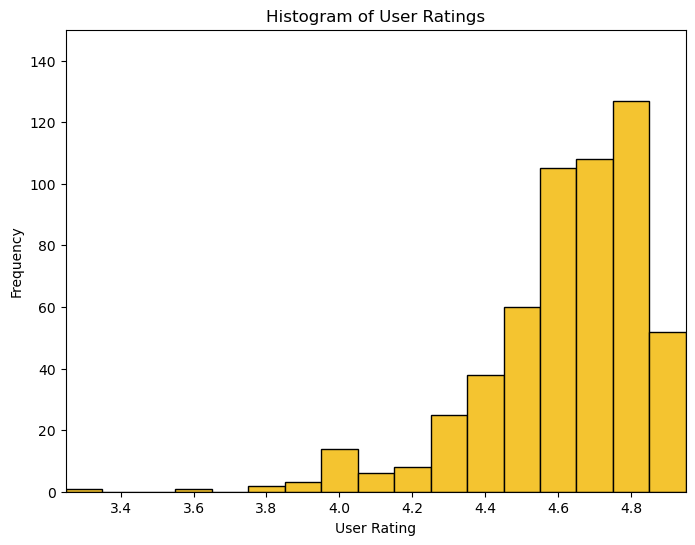

In [27]:
plt.figure(figsize=(8, 6))

# Because this graph includes floats that are not evenly representable by powers of two, floating-point errors arise.
# These errors can result in ratings doubling up in a single bin or some bins disappearing entirely.
# Bins have been offset to avoid this.
bins = np.linspace(3.25, 4.95, 18)

plt.hist(books_df['User Rating'], bins=bins, edgecolor='black', color='#F4C430')
plt.title('Histogram of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.xlim(3.25, 4.95)
plt.ylim(0, 150)
plt.show()

# It appears that user rating is left-skewed and clustered around 4.6-4.8.
# It also appears that there is a spike around 4.0 (as Amazon gives 4 stars as an option, but not 4.1 stars).
# Interestingly, no book had a rating of 5.0, nor did any book have a rating below 3.3.
# There are a few notable outliers around the ratings 3.3 and 3.6, far below the average.
# Next, let's visualize the prices of books in the dataframe:

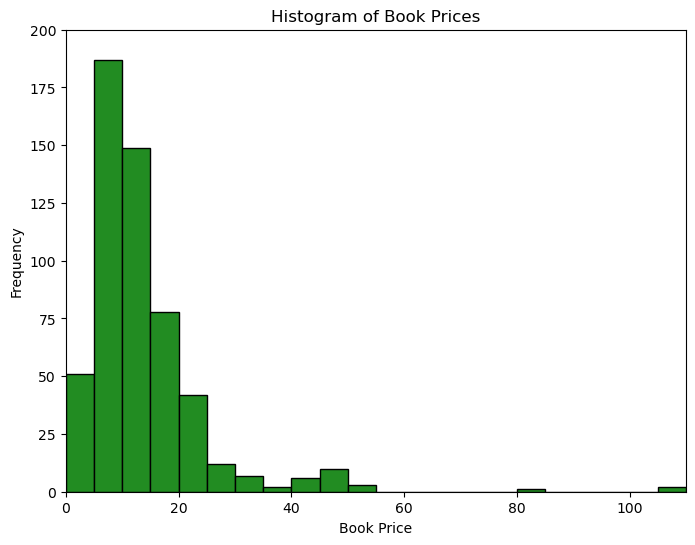

In [30]:
plt.figure(figsize=(8, 6))
bins = np.linspace(0, 110, 23)
plt.hist(books_df['Price'], bins=bins, edgecolor='black', color='#228C22')
plt.title('Histogram of Book Prices')
plt.xlabel('Book Price')
plt.ylabel('Frequency')
plt.xlim(0, 110)
plt.ylim(0, 200)
plt.show()

# It appears that book price is right-skewed and clustered around 5-15.
# It also appears that there is a spike around 40-50, for unclear reasons.
# No book had a price above 105, and few had a price above 55.
# There are outliers around 80-85 and 105-110, far above the average.
# Next, let's plot these both on a scatterplot to figure out approximately how correlated they are:

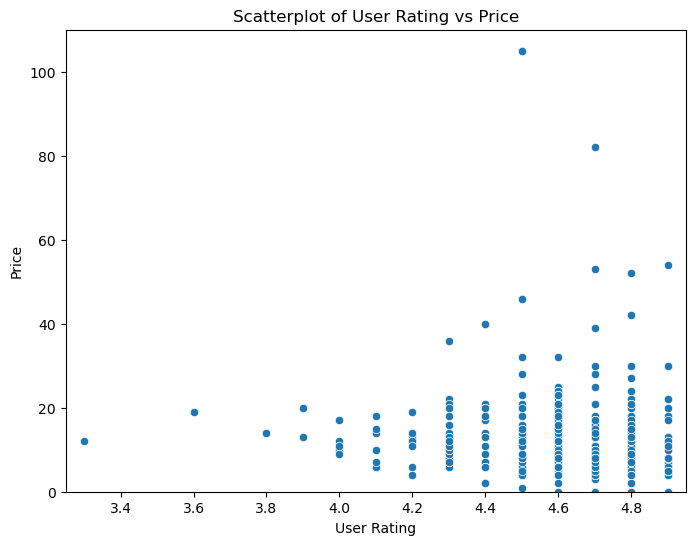

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=books_df, x='User Rating', y='Price')
plt.title('Scatterplot of User Rating vs Price')
plt.xlim(3.25, 4.95)
plt.ylim(0, 110)
plt.show()

# As we can see, the fact that user rating is only reported to one decimal produces a very clustered graph.
# It also appears that some books have a price of 0. This may skew the "bestselling" list as they are not actually sold; they're free.
# Attempting to find a correlation, it's a lot harder than it first appears.
# The majority of books cluster around a "pack", with a user rating of 4.0-4.9 and a price of 0-25.
# There are also a few outliers with lower user ratings, but they tend to show the same prices as the "pack".
# However, there are several notable outliers with higher prices appearing at user ratings >= 4.3.
# This could indicate a weakly positive correlation, with the "pack" not showing a correlation due to the difficulty of reading the graph.
# However, it could also reflect a greater abundance of books, and therefore outliers, at higher user ratings, with no actual correlation.
# Let's find the Pearson correlation coefficient (r) to attempt to figure out which of these explanations is correct:

In [34]:
r = books_df['User Rating'].corr(books_df['Price'])
print("Pearson correlation coefficient:", r)

Pearson correlation coefficient: -0.13308628728087965


# Interesting: the Pearson correlation coefficient appears to disagree with both explanations.
# The Pearson correlation coefficient shows a weakly negative correlation, in contrast to both a weakly positive or no correlation.
# It is hard to reconcile these facts. Let's consider what might cause this.
# One factor is the fact that the graph is hard to read due to the heavy clustering of user rating.
# Effectively, I'm only able to see a sample of the graph, reducing the reliability of my visual observations.
# The Pearson correlation coefficient considers every value on the graph, and therefore can examine the entire dataset.
# Another factor might be the small sample size in general.
# 550 books are represented in the dataset, and while that is a significant amount, it's not enough to fully fill in sparse regions.
# This could lead to outliers dragging down the Pearson correlation coefficient, whereas a larger sample might not report a correlation.
# A third factor could be a few notable outliers around user ratings 3.6-3.9 and prices 13-20.
# If Pandas attempts to find r through linear regression, it could find a local maximum from measuring from these points to the "pack".
# Given that the "pack" is slightly lower in price on average, this could result in Pandas finding a negative correlation.
# This assumes Pandas finds r via linear regression; the actual implementation of the algorithm could vary, and there are simpler options.
# In addition, there are a fewer number of these outliers than ones with high user ratings and high prices.
# This makes it unlikely that they could skew the distribution noticeably without Pandas attempting to fit a curve.

# Conclusion:
# I think it's most likely that I just can't visually examine the entire dataset.
# The intense clustering around user rating makes the "pack" hard to read; it could be weakly negative after all, and I just can't tell.
# The Pearson correlation coefficient will always be more reliable than any visual conclusions I can make.
# It's also unlikely that sample size is playing a role. 550 books is a significant sample size, and deviations are minimal at these scales.
# Such deviations would also likely show up on the graph.
# It's also unlikely that Pandas uses an algorithm like linear regression to find the Pearson correlation coefficient.
# It's generally less efficient than a straight calculation using mean and standard deviation.
# Even if Pandas did use it, it's not guaranteed that it would stick to the same local maximum over and over again.
# In conclusion, it appears that book rating and book price and correlated weakly negatively.
# Given the Pearson correlation coefficient is only -0.133, I think this correlation is not statistically significant.
# The cause of the discrepancy between this value and the graph is likely the clustering of user rating around specific values.
# This makes the graph hard to read and deeper patterns difficult to discern.